# Setup Notebook

In [437]:
import IPython
import numpy as np
import pandas as pd
import matplotlib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

import matplotlib.pyplot as plt
import random

# Data Preparation

In [438]:
msg_df = pd.read_csv('spam.csv', encoding='cp1252')
msg_df = msg_df.drop(msg_df.columns[[2, 3, 4]], axis=1)

In [439]:
msg_df.head()
msg_df.shape

(5572, 2)

In [440]:
# converting label to 0s and 1s 
for index, row in msg_df.iterrows():
        if row["v1"] == "ham":
            row["v1"] = 0
        else:
            row["v1"] = 1

In [441]:
msg_df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [443]:
# split data into feature and labels
label = msg_df['v1']
feature = msg_df['v2']

In [444]:
# split the data into training and testing (30% split)
train_feature, test_feature, train_label, test_label = train_test_split(feature, label, test_size = 0.3)

# uses TF-IDF to identify the features we will be using
cv = TfidfVectorizer(min_df = 1, stop_words="english")
train_feat_cv = cv.fit_transform(train_feature).toarray()
train_label = train_label.astype('int')

test_feat_cv = cv.transform(test_feature).toarray()
test_label = test_label.astype('int')

# Create a Model Using Gaussian Naives Bayes Classifier

In [445]:
mnb = MultinomialNB()

mnb.fit(train_feat_cv, train_label)
mnb_predictions = mnb.predict(test_feat_cv)
mnb_pred_proba = mnb.predict_proba(test_feat_cv)[:, 1]

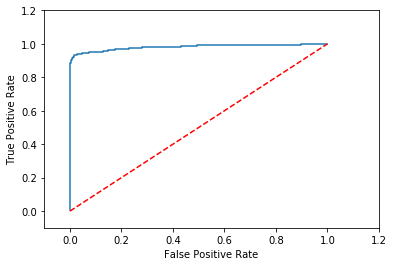

In [446]:
mnb_fpr, mnb_tpr, mnb_thresholds = roc_curve(test_label, mnb_pred_proba)
plt.plot(mnb_fpr, mnb_tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [447]:
print('AUC Score:' , roc_auc_score(test_label, mnb_pred_proba))

AUC Score: 0.9815253831417625


In [448]:
accuracy_score(test_label, mnb_predictions)

0.9677033492822966

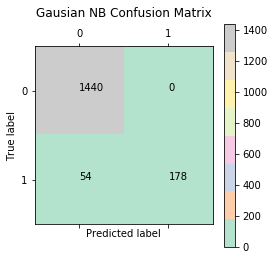

In [449]:
mnb_cm = confusion_matrix(test_label, mnb_predictions)

plt.matshow(mnb_cm, cmap='Pastel2')

i = 0
j = 0
for i in range(gnb_cm.shape[0]):
    for j in range(mnb_cm.shape[1]):
        plt.text(i, j, mnb_cm[j][i])

plt.title('Gausian NB Confusion Matrix', y=1.13)

plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()    

In [450]:
mnb_TP = mnb_cm[1, 1]
mnb_TN = mnb_cm[0, 0]
mnb_FP = mnb_cm[0, 1]
mnb_FN = mnb_cm[1, 0]

print('True Positive', mnb_TP)
print('True Negative', mnb_TN)
print('False Positive', mnb_FP)
print('False Negative', mnb_FN)

print("MNB Precision:", precision_score(test_label, mnb_predictions))

mnb_specificity = mnb_TN / float(mnb_TN + mnb_FP)
print("MNB Specificity:", mnb_specificity)

True Positive 178
True Negative 1440
False Positive 0
False Negative 54
MNB Precision: 1.0
MNB Specificity: 1.0


# Create a Model Using Random Forests

In [451]:
rf = RandomForestClassifier()

rf.fit(train_feat_cv, train_label)
rf_predictions = rf.predict(test_feat_cv)
rf_pred_proba = rf.predict_proba(test_feat_cv)[:, 1]

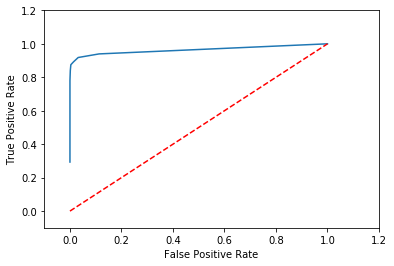

In [452]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(test_label, rf_pred_proba)
plt.plot(rf_fpr, rf_tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [453]:
print('AUC Score:' , roc_auc_score(test_label, rf_pred_proba) * 100, "%")

AUC Score: 96.3980184386973 %


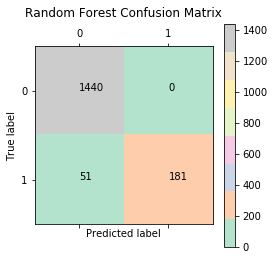

In [454]:
rf_cm = confusion_matrix(test_label, rf_predictions)
plt.matshow(rf_cm, cmap='Pastel2')

i = 0
j = 0
for i in range(rf_cm.shape[0]):
    for j in range(rf_cm.shape[1]):
        plt.text(i, j, rf_cm[j][i])

plt.title('Random Forest Confusion Matrix', y=1.13)

plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()    

In [455]:
rf_TP = rf_cm[1, 1]
rf_TN = rf_cm[0, 0]
rf_FP = rf_cm[0, 1]
rf_FN = rf_cm[1, 0]

print('True Positive', rf_TP)
print('True Negative', rf_TN)
print('False Positive', rf_FP)
print('False Negative', rf_FN)

print("GNB Precision:", precision_score(test_label, rf_predictions))

rf_specificity = rf_TN / float(rf_TN + rf_FP)
print("GNB Specificity:", rf_specificity)

True Positive 181
True Negative 1440
False Positive 0
False Negative 51
GNB Precision: 1.0
GNB Specificity: 1.0


# Create a Model Using Logistic Regression

In [456]:
lr = LogisticRegression()

lr.fit(train_feat_cv, train_label)
lr_predictions = lr.predict(test_feat_cv)
lr_pred_proba = lr.predict_proba(test_feat_cv)[:, 1]

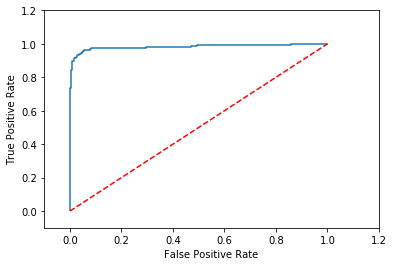

In [457]:
lr_fpr, lr_tpr, lr_thresholds = roc_curve(test_label, lr_pred_proba)
plt.plot(lr_fpr, lr_tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [458]:
print('AUC Score:' , roc_auc_score(test_label, lr_pred_proba) * 100, "%")

AUC Score: 98.19085249042145 %


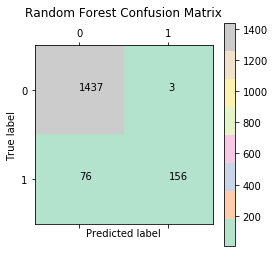

In [459]:
lr_cm = confusion_matrix(test_label, lr_predictions)
plt.matshow(lr_cm, cmap='Pastel2')

i = 0
j = 0
for i in range(lr_cm.shape[0]):
    for j in range(lr_cm.shape[1]):
        plt.text(i, j, lr_cm[j][i])

plt.title('Random Forest Confusion Matrix', y=1.13)

plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()    

In [404]:
lr_TP = lr_cm[1, 1]
lr_TN = lr_cm[0, 0]
lr_FP = lr_cm[0, 1]
lr_FN = lr_cm[1, 0]

print('True Positive', lr_TP)
print('True Negative', lr_TN)
print('False Positive', lr_FP)
print('False Negative', lr_FN)

print("GNB Precision:", precision_score(test_label, lr_predictions))

lr_specificity = lr_TN / float(lr_TN + lr_FP)
print("GNB Specificity:", lr_specificity)

True Positive 149
True Negative 1444
False Positive 3
False Negative 76
GNB Precision: 0.9802631578947368
GNB Specificity: 0.9979267449896337


# Performance Comparision